In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot
from sklearn.model_selection import train_test_split
import math

In [2]:
#Reading our dataset using the pandas module(read_csv())
df = pd.read_csv("C:/Users/Bhargav V/OneDrive/Desktop/DA/Fuel_consumption.csv")

In [3]:
df.describe()

,xModel-Year,Engine-Size,Cylinders,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
count,1046.0,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000
mean,2019.0,3.108795,5.595602,12.378011,9.038050,10.872562,251.312620
std,0.0,1.315989,1.796845,3.294286,2.049742,2.697321,57.017573
min,2019.0,1.000000,3.000000,4.200000,4.000000,4.100000,96.000000
25%,2019.0,2.000000,4.000000,10.200000,7.600000,9.100000,212.250000
50%,2019.0,3.000000,6.000000,12.050000,8.800000,10.600000,248.000000
75%,2019.0,3.600000,6.000000,14.300000,10.200000,12.575000,289.000000
max,2019.0,8.000000,16.000000,26.800000,17.200000,22.200000,522.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 12 columns):
xModel-Year              1046 non-null int64
Make                     1046 non-null object
Model                    1046 non-null object
Vehicle-Class            1046 non-null object
Engine-Size              1046 non-null float64
Cylinders                1046 non-null int64
Transmission             1046 non-null object
Fuel-Type                1046 non-null object
Fuel-Consumption-City    1046 non-null float64
Fuel-Consumption-Hwy     1046 non-null float64
Fuel-Consumption-Comb    1046 non-null float64
CO2-Emissions            1046 non-null int64
dtypes: float64(4), int64(3), object(5)
memory usage: 98.1+ KB


In [5]:
missing=df[df.isnull().any(axis=1)]

In [6]:
df = df.drop_duplicates()
df.describe()

,xModel-Year,Engine-Size,Cylinders,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
count,1046.0,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000
mean,2019.0,3.108795,5.595602,12.378011,9.038050,10.872562,251.312620
std,0.0,1.315989,1.796845,3.294286,2.049742,2.697321,57.017573
min,2019.0,1.000000,3.000000,4.200000,4.000000,4.100000,96.000000
25%,2019.0,2.000000,4.000000,10.200000,7.600000,9.100000,212.250000
50%,2019.0,3.000000,6.000000,12.050000,8.800000,10.600000,248.000000
75%,2019.0,3.600000,6.000000,14.300000,10.200000,12.575000,289.000000
max,2019.0,8.000000,16.000000,26.800000,17.200000,22.200000,522.000000


In [7]:
df.isnull().sum()

xModel-Year              0
Make                     0
Model                    0
Vehicle-Class            0
Engine-Size              0
Cylinders                0
Transmission             0
Fuel-Type                0
Fuel-Consumption-City    0
Fuel-Consumption-Hwy     0
Fuel-Consumption-Comb    0
CO2-Emissions            0
dtype: int64

In [8]:
df.isnull().sum()

xModel-Year              0
Make                     0
Model                    0
Vehicle-Class            0
Engine-Size              0
Cylinders                0
Transmission             0
Fuel-Type                0
Fuel-Consumption-City    0
Fuel-Consumption-Hwy     0
Fuel-Consumption-Comb    0
CO2-Emissions            0
dtype: int64

In [9]:
df['Make'].nunique()

39

In [10]:
df['Model'].nunique()

746

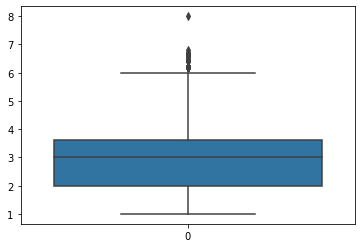

In [11]:
#in the box plot for Engine size we can see the outliers aboce the Q3 region
sd = df['Engine-Size']
sns.boxplot(data = sd)

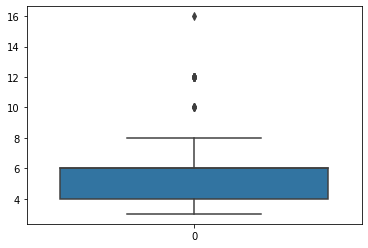

In [12]:
#in the box plot for Cylinders we can see the outliers aboce the Q3 region
sd = df['Cylinders']
sns.boxplot(data = sd)

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

#Discarding the tuples with the outliers wehave found for few of the attributes 
df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(969, 12)

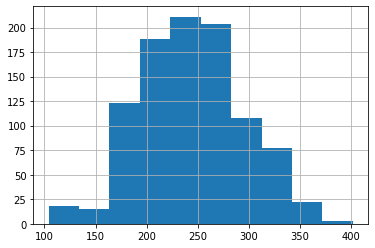

In [14]:
#From this histogram we observe here that most models emits CO2 in the rate of 250 which is likely to be eco friendly than 
#higher rates. We should try to reduce to even better than this achieve eco friendly nature by finding out the necessary
#correlations where CO2 emissions should be at a certain minimum rate. 
viz1 = df['CO2-Emissions']
viz1.hist(bins=10)
plt.show()

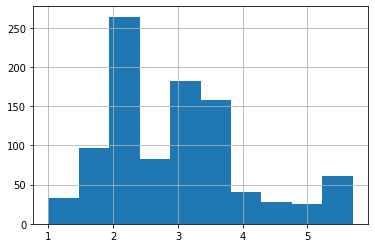

In [15]:
#We can observe here that most of the models engine size lies between 2 and 3 units
viz1 = df['Engine-Size']
viz1.hist(bins=10)
plt.show()

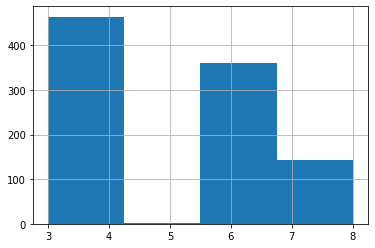

In [16]:
#We can observe here that most of the models engine size lies between 3 and 4 units
viz1 = df['Cylinders']
viz1.hist(bins=4)
plt.show()

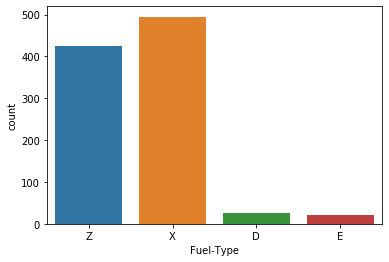

In [17]:
#Most of fuel_type is found to be X and Z.
sns.countplot(x='Fuel-Type',data=df)
plt.show()

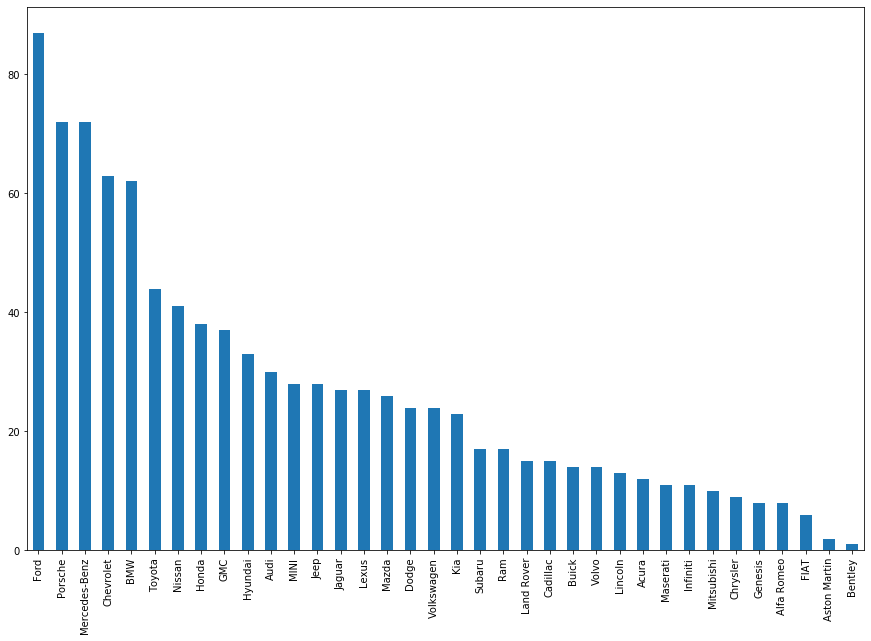

In [18]:
#Number of unique models in the decreasing order based on the counts 
x=df['Make'].unique()
y=df['Make'].value_counts().plot(kind='bar',figsize=(15,10))

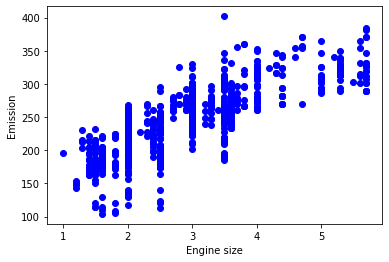

In [19]:
#This graph basically finds out the correlation between the engine size and CO2-emmisions using scatter plot. We can observe
#that the CO2-emmisions is linearly depending on the engine size. Hence we have to look on an engine with least possible engine
#size considering all other aspects being efficient for a model(vehicle)
plt.scatter(df['Engine-Size'], df['CO2-Emissions'],  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [20]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(df[['Engine-Size']])
train_y = np.asanyarray(df[['CO2-Emissions']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[37.39570343]]
Intercept:  [135.60119981]


Text(0, 0.5, 'Emission')

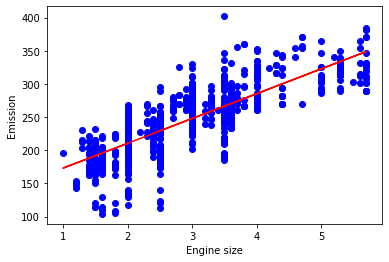

In [21]:
plt.scatter(df['Engine-Size'], df['CO2-Emissions'],  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

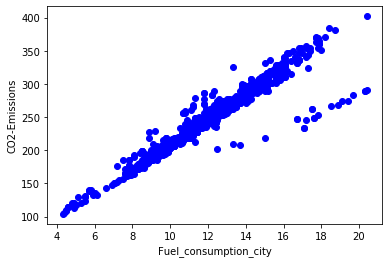

In [22]:
#This graph basically finds out the correlation between the fuel consumption city and CO2-emmisions using scatter plot. We can 
#observe that the CO2-emmisions is linearly depending on the fuel consumption city. Hence we have to look on an engine with least possible 
#fuel consuming during the city drive considering all other aspects being efficient for a model(vehicle)
plt.scatter(df['Fuel-Consumption-City'], df['CO2-Emissions'],  color='blue')
plt.xlabel("Fuel_consumption_city")
plt.ylabel("CO2-Emissions")
plt.show()

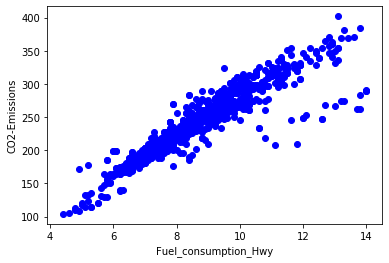

In [23]:
plt.scatter(df['Fuel-Consumption-Hwy'], df['CO2-Emissions'],  color='blue')
plt.xlabel("Fuel_consumption_Hwy")
plt.ylabel("CO2-Emissions")
plt.show()

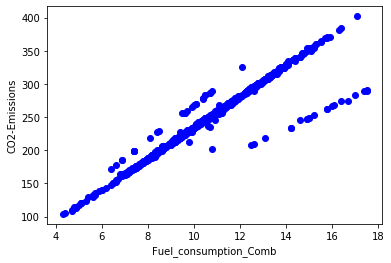

In [24]:
#This graph basically finds out the correlation between the fuel consumption combining city and highway and CO2-emmisions using 
#scatter plot. We can observe that the CO2-emmisions is linearly depending on the fuel consumption city. Hence we have to look 
#on an engine with least possible fuel consuming during drive considering all other aspects being efficient for a model(vehicle)
plt.scatter(df['Fuel-Consumption-Comb'], df['CO2-Emissions'],  color='blue')
plt.xlabel("Fuel_consumption_Comb")
plt.ylabel("CO2-Emissions")
plt.show()

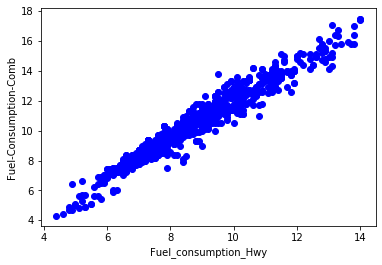

In [25]:
plt.scatter(df['Fuel-Consumption-Hwy'], df['Fuel-Consumption-Comb'],  color='blue')
plt.xlabel("Fuel_consumption_Hwy")
plt.ylabel("Fuel-Consumption-Comb")
plt.show()

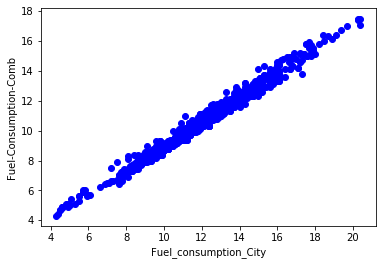

In [26]:
plt.scatter(df['Fuel-Consumption-City'], df['Fuel-Consumption-Comb'],  color='blue')
plt.xlabel("Fuel_consumption_City")
plt.ylabel("Fuel-Consumption-Comb")
plt.show()

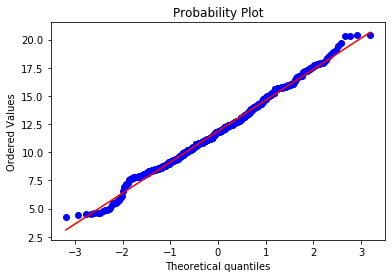

In [27]:
#We have plotted the probability plots to check whether the Data is approximately normally distributed

x2=df['Fuel-Consumption-City']
probplot(x2,dist="norm",plot=plt)
plt.show()

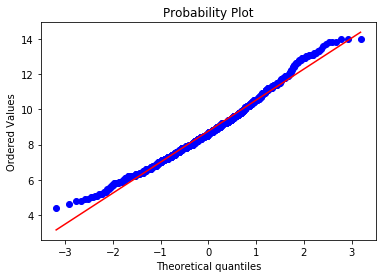

In [28]:
x2=df['Fuel-Consumption-Hwy']
probplot(x2,dist="norm",plot=plt)
plt.show()

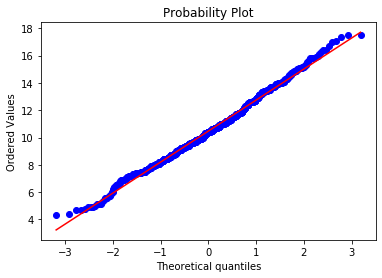

In [29]:
x2=df['Fuel-Consumption-Comb']
probplot(x2,dist="norm",plot=plt)
plt.show()

In [30]:
##Correlation between variables
d1=df['Engine-Size']
d2=df['Cylinders']
d3=df['Fuel-Consumption-City']
d4=df['Fuel-Consumption-Hwy']
d5=df['Fuel-Consumption-Comb']
d6=df['CO2-Emissions']
print(d1.corr(d6))
print(d2.corr(d6))
print(d3.corr(d6))
print(d4.corr(d6))
print(d5.corr(d6))
print(d3.corr(d5))
print(d4.corr(d5))

0.8122800688872229
0.7863178354721755
0.9443101737574319
0.9217325276074402
0.9509888697593981
0.9921363076425859
0.970961589282952


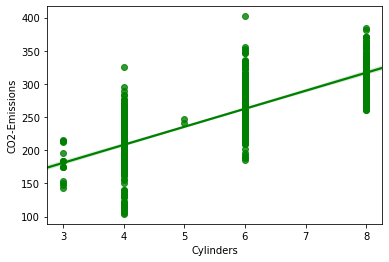

In [31]:
#Regression plots between the cylinder and CO2 emission here we can observe that the cylinders is linear and positively 
#correlated with the CO2 emissions
import seaborn as sns
ax = sns.regplot(x='Cylinders', y='CO2-Emissions', data=df, color='green' )

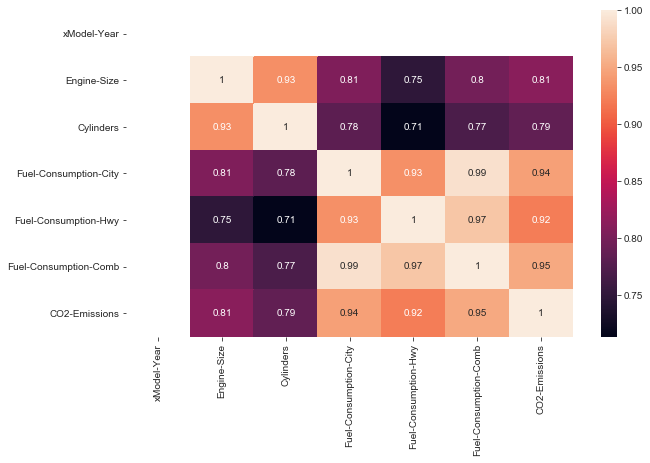

In [32]:
#Heatmaps are utilized to show connections between two variables, one plotted on each axis. By seeing how cell colors change 
#over each axis, you can notice if there are any examples in an incentive for one or the two variables.

corr_data = df.corr()
plt.figure(figsize=(10, 6))
sns.set_style('ticks')
sns.heatmap(corr_data, annot=True)
plt.show()

In [33]:
#In the decision tree regression we have firstly split the dataset into the train test dataset that helps in testing the 
#predictions inside the dataset. Here we have a built in model called the Decision Tree imported from the module sklearn.tree.
#we have computed the values of the r2 score and MSE to hceck how good the model is for our dataset.
df = df[['Engine-Size','Cylinders','Fuel-Consumption-City','Fuel-Consumption-Hwy','Fuel-Consumption-Comb']]
X = df.iloc[:,:-1].values
y = df.iloc[:,-1:].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

summ=0
n=len(y_test)
for i in range(n):
    diff = y_test[i] - y_pred[i]
    sq_diff = diff**2
    summ = summ + sq_diff
MSE = summ/n
print("Mean squared error between the test data and predict data is", MSE)

0.9968266686341777
Mean squared error between the test data and predict data is [0.01]


In [34]:
#In the multiple linear regression firstly we have split the dataset into the train test so that we can test with some part of 
#the data within the dataset. Here we have the built-in linear model called LinearRegression imported from the module sklearn.
#we have computed the values of the r2 score and MSE to check how good the model is for our dataset.
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred)) 

summ=0
n=len(y_test)
for i in range(n):
    diff = y_test[i] - y_pred[i]
    sq_diff = diff**2
    summ = summ + sq_diff
MSE = summ/n
print("Mean squared error between the test data and predict data is", MSE)

0.9994521326524487
Mean squared error between the test data and predict data is [0.]


In [35]:
#In the polynomial regression using the scikit learn we are going to do these two steps of adding polynomial features and 
#applying linear regression to it in a pipeline. We have performed the polynomial expansion of the feature X-train represented 
#in a higher order polynomial terms for the multivariate fit.We have computed the values of the r2 score and MSE to check how 
#good the model is for our dataset.
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
print(r2_score(y_test, y_pred))

summ=0
n=len(y_test)
for i in range(n):
    diff = y_test[i] - y_pred[i]
    sq_diff = diff**2
    summ = summ + sq_diff
MSE = summ/n
print("Mean squared error between the test data and predict data is", MSE)

0.9993127394251181
Mean squared error between the test data and predict data is [0.]


In [37]:
#In the Random forest regression using the scikit learn i.e sklearn.ensemble we are importing RandomForestRegressor.
#We are calling the RandomForestRegressor with the first argument being the number of forest in the random forest and assigned 
#it to some variable.We have computed the values of the r2 score and MSE to check how good the model is for our dataset.
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
print(r2_score(y_test, y_pred))

summ=0
n=len(y_test)
for i in range(n):
    diff = y_test[i] - y_pred[i]
    sq_diff = diff**2
    summ = summ + sq_diff
MSE = summ/n
print("Mean squared error between the test data and predict data is", MSE)


0.9982528328535897
Mean squared error between the test data and predict data is [0.01]


C:\Users\Bhargav V\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
